In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_cotton=pd.read_csv('/content/Unprocessed Data.csv')
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Alabama,1964,99.0,72.0,100.0,62.0,99.0,63.0,NaN,NaN,NaN
1,Alabama,1965,100.0,81.0,100.0,63.0,100.0,66.0,NaN,NaN,NaN
2,Alabama,1966,100.0,83.0,100.0,69.0,100.0,70.0,NaN,NaN,NaN
3,Alabama,1967,100.0,78.0,100.0,71.0,100.0,73.0,NaN,NaN,NaN
4,Alabama,1968,100.0,71.0,99.0,71.0,99.0,73.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
751,Texas,2013,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,4500.0,610.0
752,Texas,2014,NaN,NaN,NaN,NaN,NaN,NaN,5650.0,5200.0,748.0
753,Texas,2015,66.0,65.0,46.0,34.0,16.0,14.0,7000.0,5500.0,809.0
754,Texas,2016,NaN,NaN,NaN,NaN,NaN,NaN,7750.0,4350.0,756.0


# Data Pre-processing (1)

In [ ]:
df_cotton.isna().sum()

State                                   0
Year                                    0
Nitrogen (%)                          288
Nitrogen (Pounds/Acre)                288
Phosphorous (%)                       288
Phosphorous (Pounds/Acre)             288
Potash (%)                            294
Potash (Pounds/Acre)                  298
Area Planted (acres)                  126
Harvested Area (acres)                126
Lint Yield (Pounds/Harvested Acre)    126
dtype: int64

In [ ]:
df_cotton.groupby('State').mean()

,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
State,,,,,,,,,,
Alabama,1990.5,99.032258,82.806452,92.774194,64.806452,92.903226,74.258065,419.355556,407.822222,644.688889
Arizona,1990.5,93.564103,144.410256,43.205128,60.846154,6.054054,23.411765,289.488889,287.800000,1290.288889
Arkansas,1990.5,97.139535,80.883721,72.697674,41.813953,76.348837,62.069767,733.666667,710.888889,805.911111
California,1990.5,93.975000,131.175000,35.625000,67.750000,10.236842,52.432432,751.577778,744.711111,1299.088889
Georgia,1990.5,98.441176,90.529412,95.117647,58.117647,97.000000,91.558824,865.622222,837.977778,684.311111
Louisiana,1990.5,96.325000,79.600000,62.200000,46.900000,63.875000,57.700000,532.888889,519.866667,751.666667
Mississippi,1990.5,98.953488,101.720930,44.767442,55.372093,54.790698,74.697674,978.155556,961.200000,809.400000
Missouri,1990.5,96.933333,67.300000,86.366667,43.933333,92.433333,64.200000,301.133333,290.955556,769.911111
New Mexico,1990.5,58.190476,68.190476,43.571429,61.857143,8.842105,20.210526,69.533333,60.088889,777.777778


In [ ]:
df_cotton=df_cotton.fillna(df_cotton.groupby('State').transform('mean'))

In [ ]:
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Alabama,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222,644.688889
1,Alabama,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222,644.688889
2,Alabama,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222,644.688889
3,Alabama,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222,644.688889
4,Alabama,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222,644.688889
...,...,...,...,...,...,...,...,...,...,...,...
751,Texas,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000,610.000000
752,Texas,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000,748.000000
753,Texas,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000,809.000000
754,Texas,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000,756.000000


In [ ]:
df_cotton.isna().sum()

State                                 0
Year                                  0
Nitrogen (%)                          0
Nitrogen (Pounds/Acre)                0
Phosphorous (%)                       0
Phosphorous (Pounds/Acre)             0
Potash (%)                            0
Potash (Pounds/Acre)                  0
Area Planted (acres)                  0
Harvested Area (acres)                0
Lint Yield (Pounds/Harvested Acre)    0
dtype: int64

In [ ]:
df_cotton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               756 non-null    object 
 1   Year                                756 non-null    int64  
 2   Nitrogen (%)                        756 non-null    float64
 3   Nitrogen (Pounds/Acre)              756 non-null    float64
 4   Phosphorous (%)                     756 non-null    float64
 5   Phosphorous (Pounds/Acre)           756 non-null    float64
 6   Potash (%)                          756 non-null    float64
 7   Potash (Pounds/Acre)                756 non-null    float64
 8   Area Planted (acres)                756 non-null    float64
 9   Harvested Area (acres)              756 non-null    float64
 10  Lint Yield (Pounds/Harvested Acre)  756 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usa

# Data Visualization

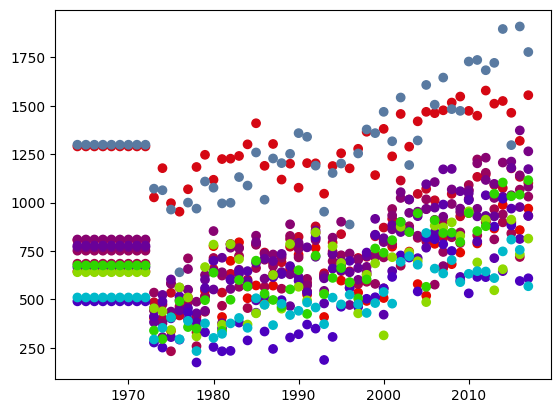

In [ ]:
fig, ax = plt.subplots()

colors = {'Alabama':'#E50800',
          'Arizona':'#D50713',
          'Arkansas':'#C60626',
          'California':'#597AA1',
          'Georgia':'#A7044C',
          'Louisiana':'#98045F',
          'Mississippi':'#880372',
          'Missouri':'#790285',
          'New Mexico':'#690198',
          'North Carolina':'#5A00AB',
          'Oklahoma':'#4B00BF',
          'South Carolina':'#8FD900',
          'Tennessee':'#2FD500',
          'Texas':'#00B9CA'
           }

ax.scatter(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)'], c=df_cotton['State'].apply(lambda x: colors[x]),)

plt.show()

Text(0.5, 1.0, 'Potash (Pounds/Acre)')

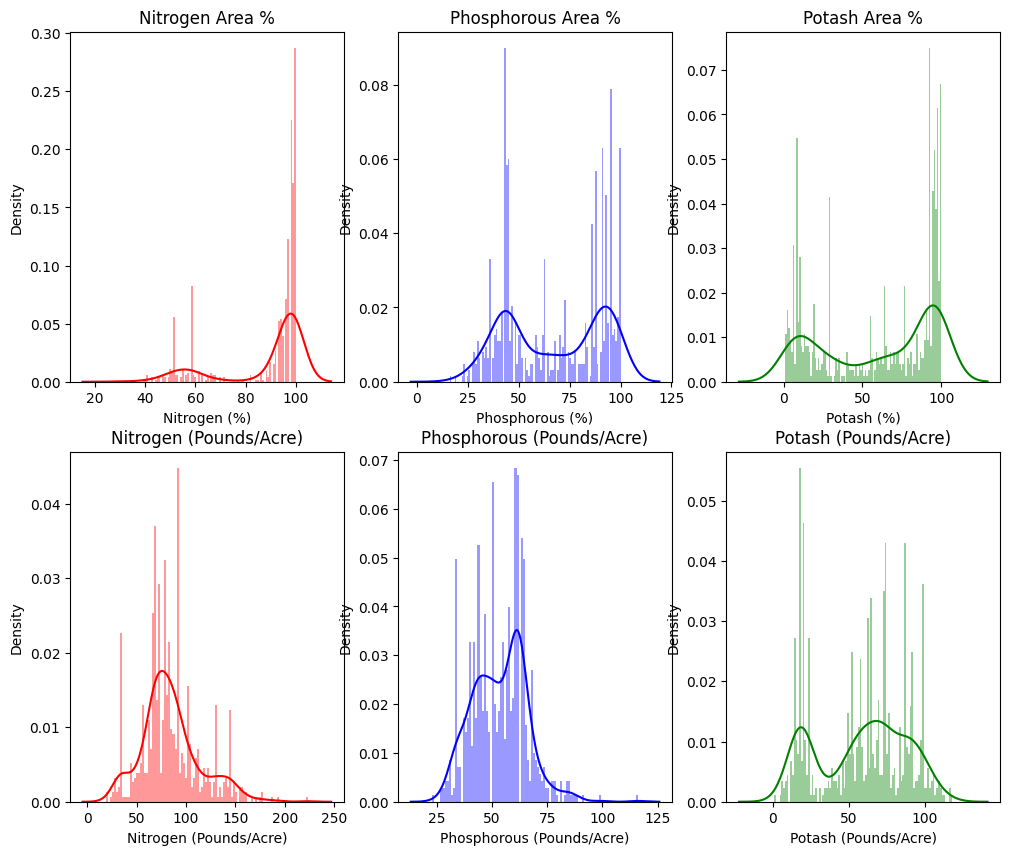

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(231) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (%)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen Area %')

plt.subplot(232) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (%)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous Area %')

plt.subplot(233) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (%)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash Area %')

plt.subplot(234) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (Pounds/Acre)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen (Pounds/Acre)')

plt.subplot(235) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (Pounds/Acre)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous (Pounds/Acre)')

plt.subplot(236) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (Pounds/Acre)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash (Pounds/Acre)')

Text(0.5, 0, 'State Name')

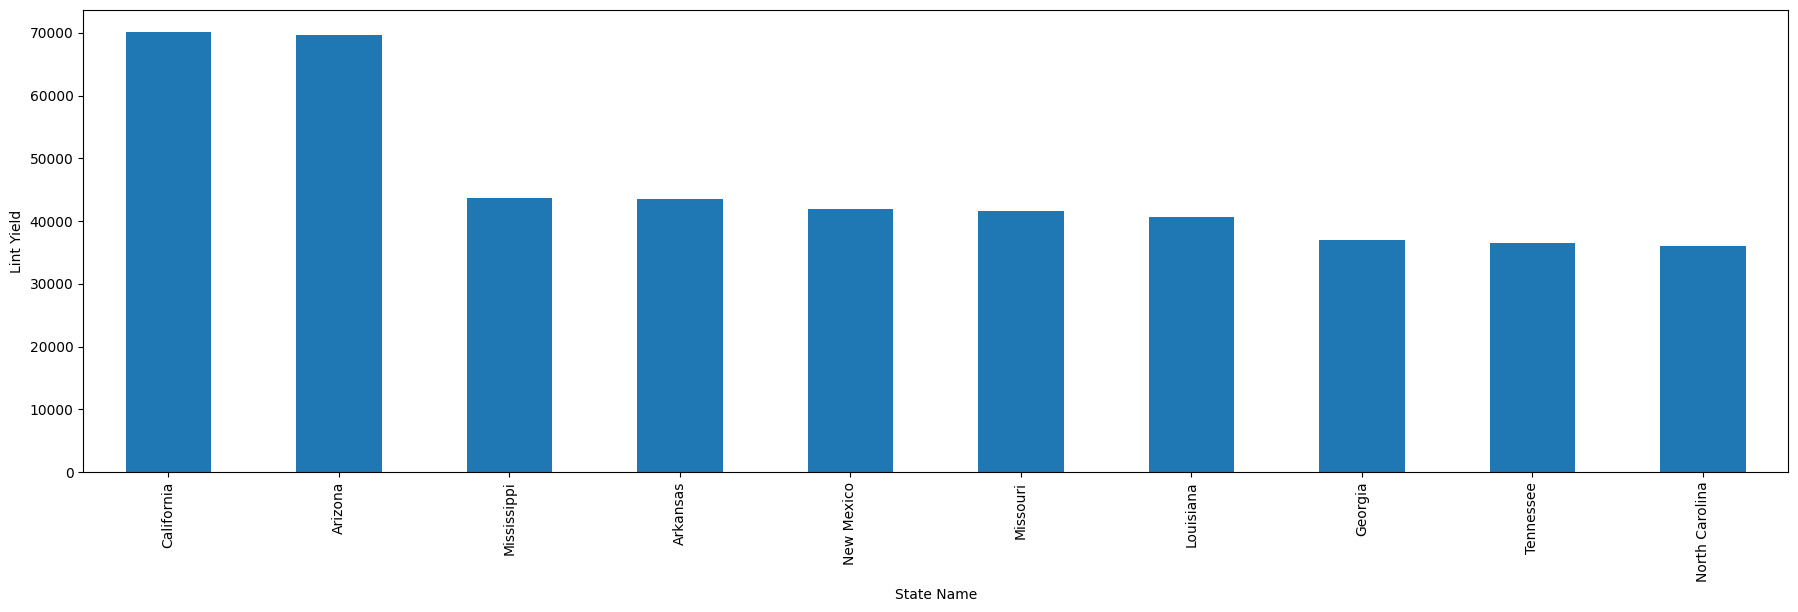

In [ ]:
plt.figure(figsize=(22,6))
GraphData=df_cotton.groupby(['State'])['Lint Yield (Pounds/Harvested Acre)'].sum().nlargest(10)


GraphData.plot(kind='bar')
plt.ylabel('Lint Yield')
plt.xlabel('State Name')

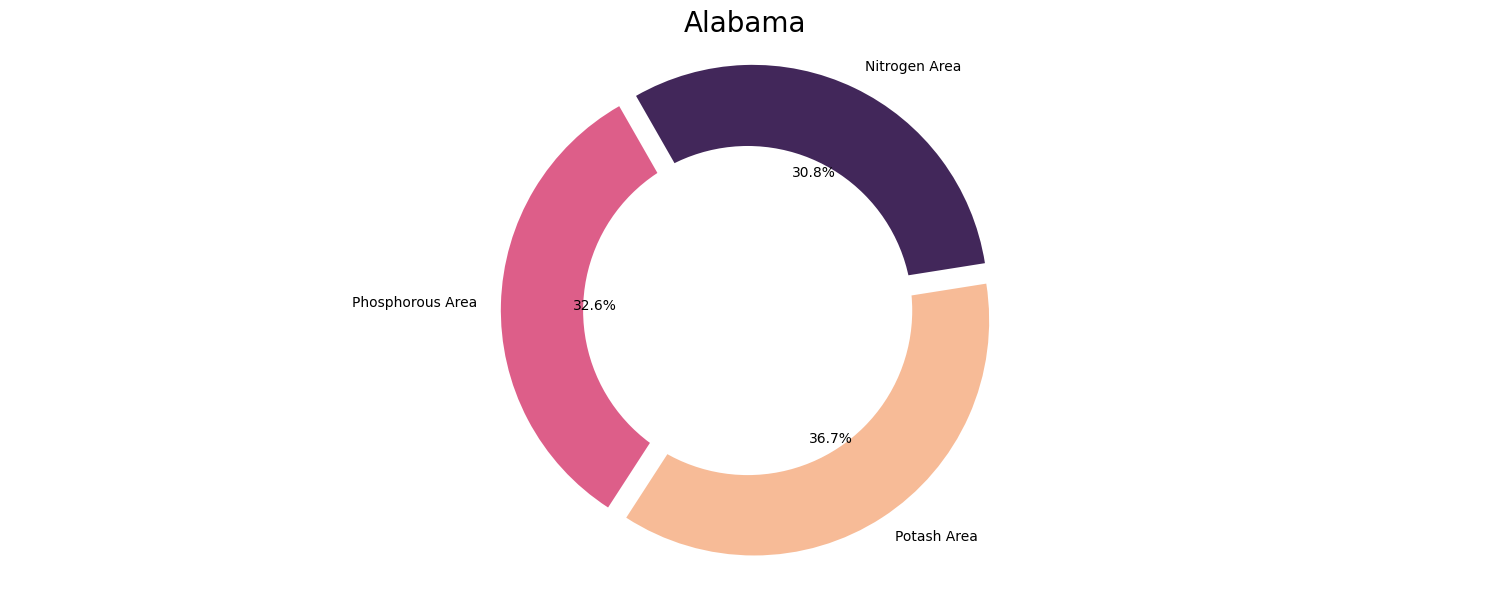

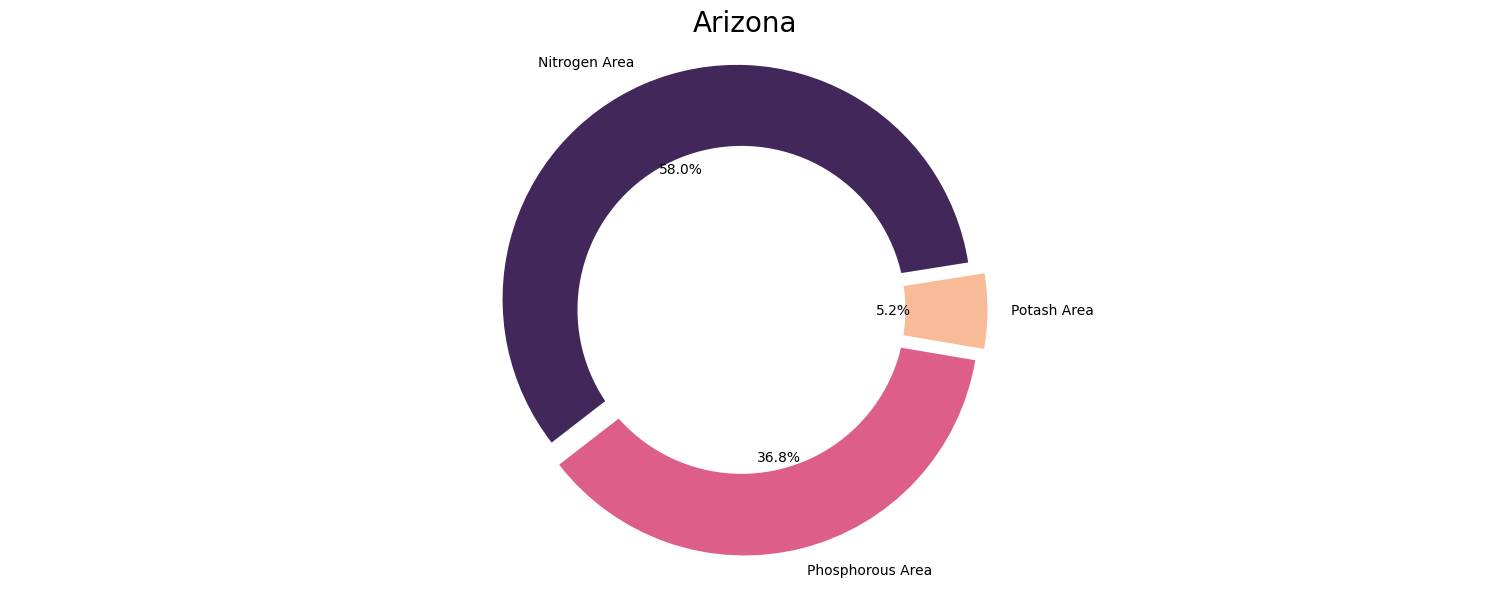

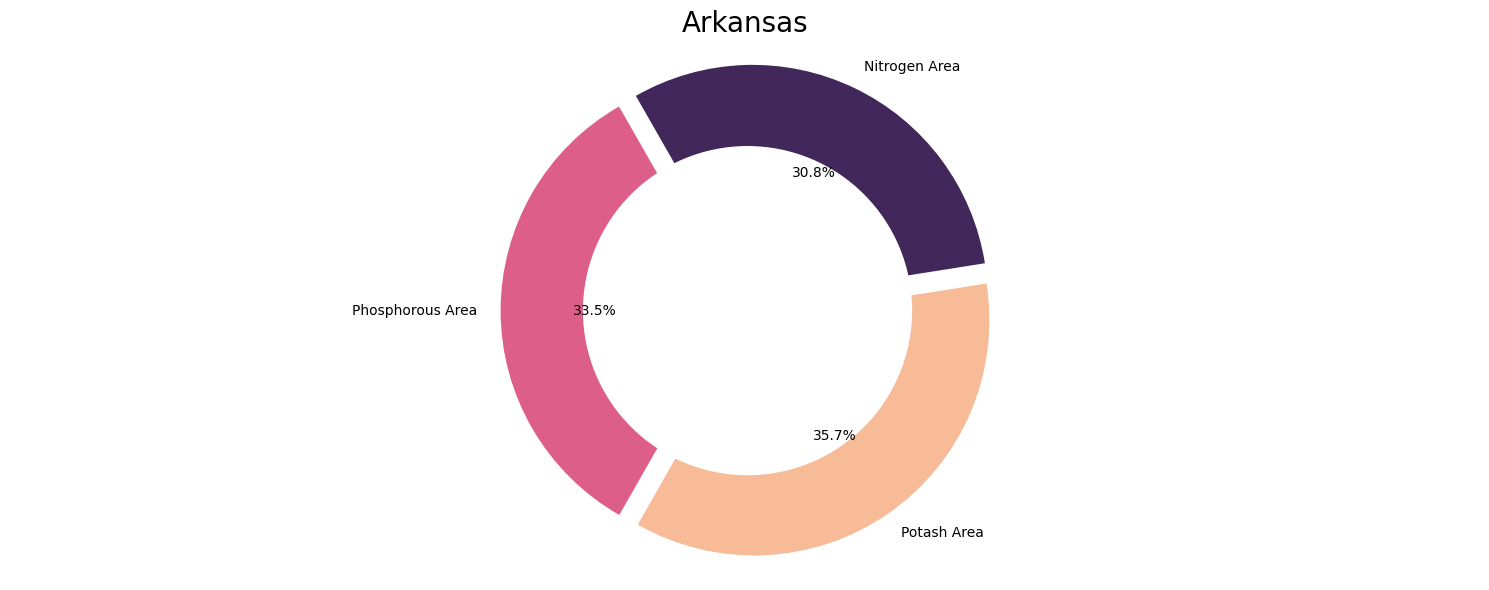

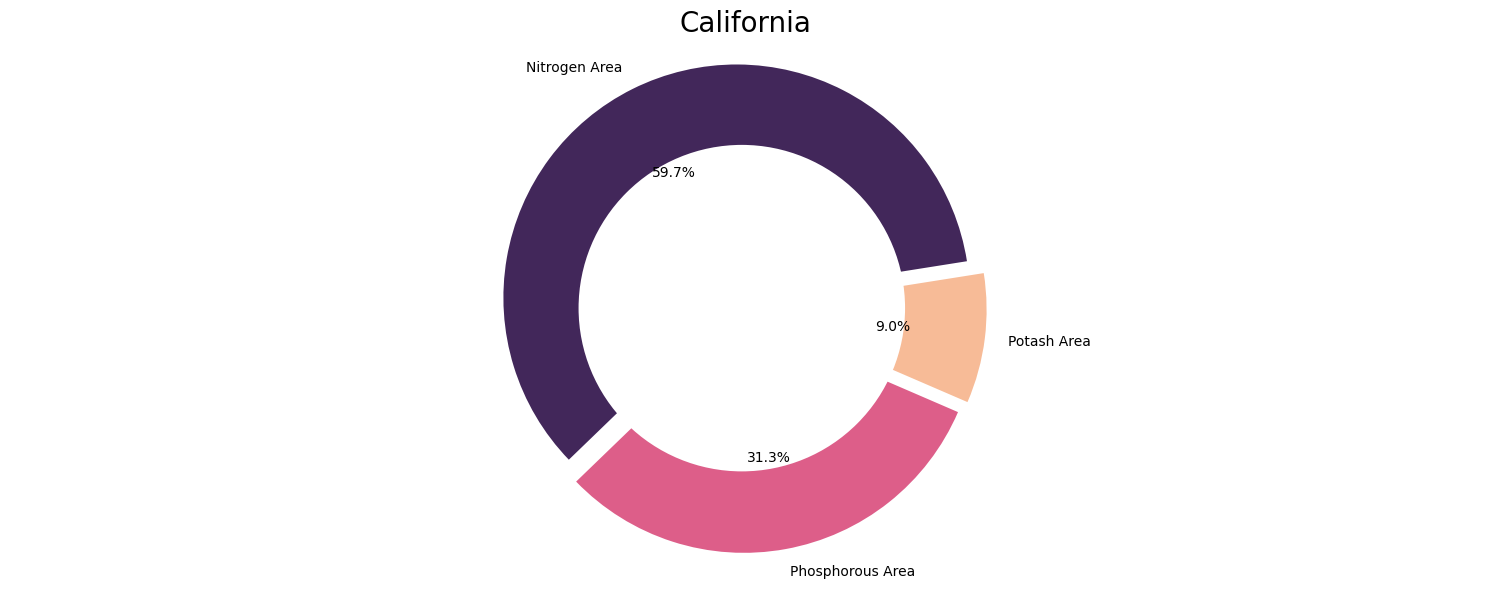

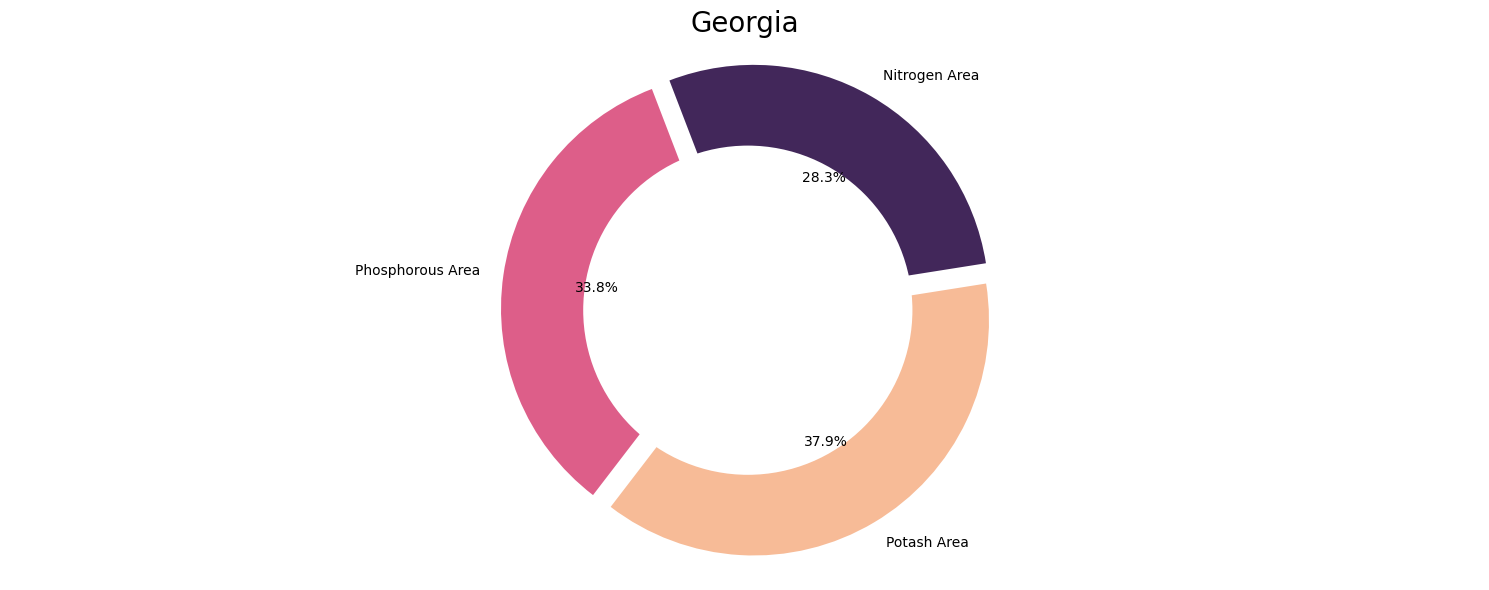

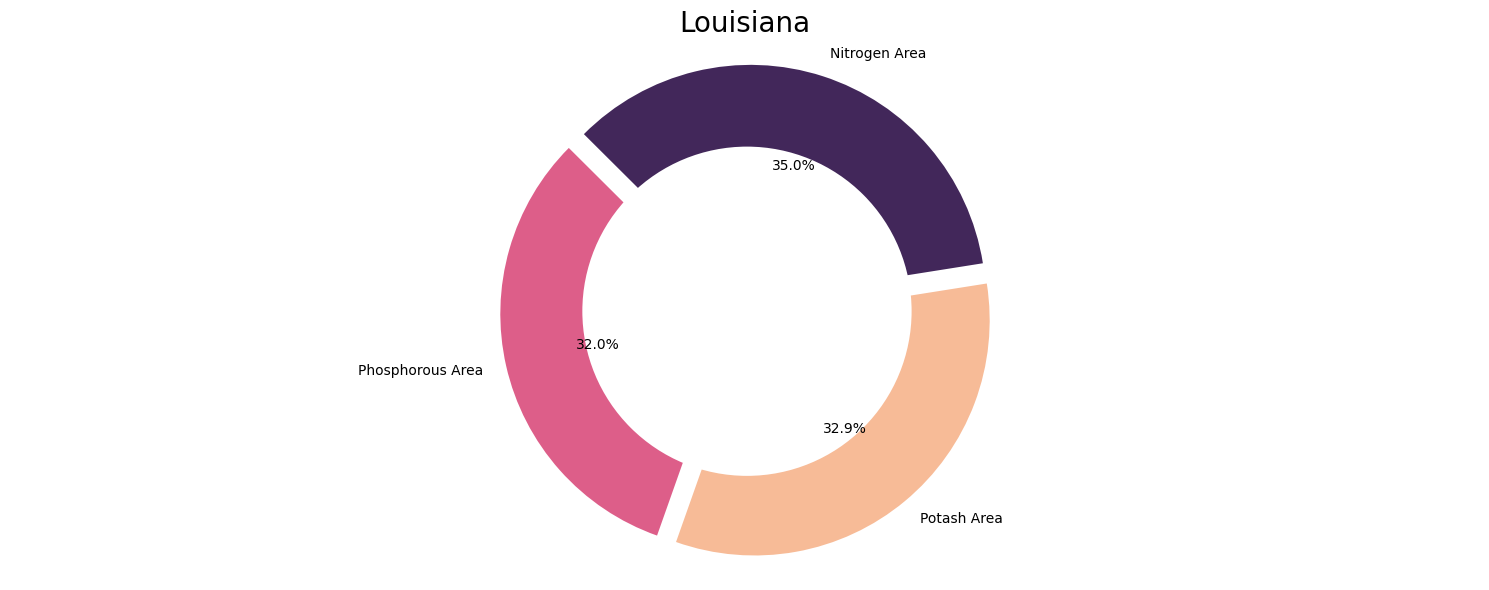

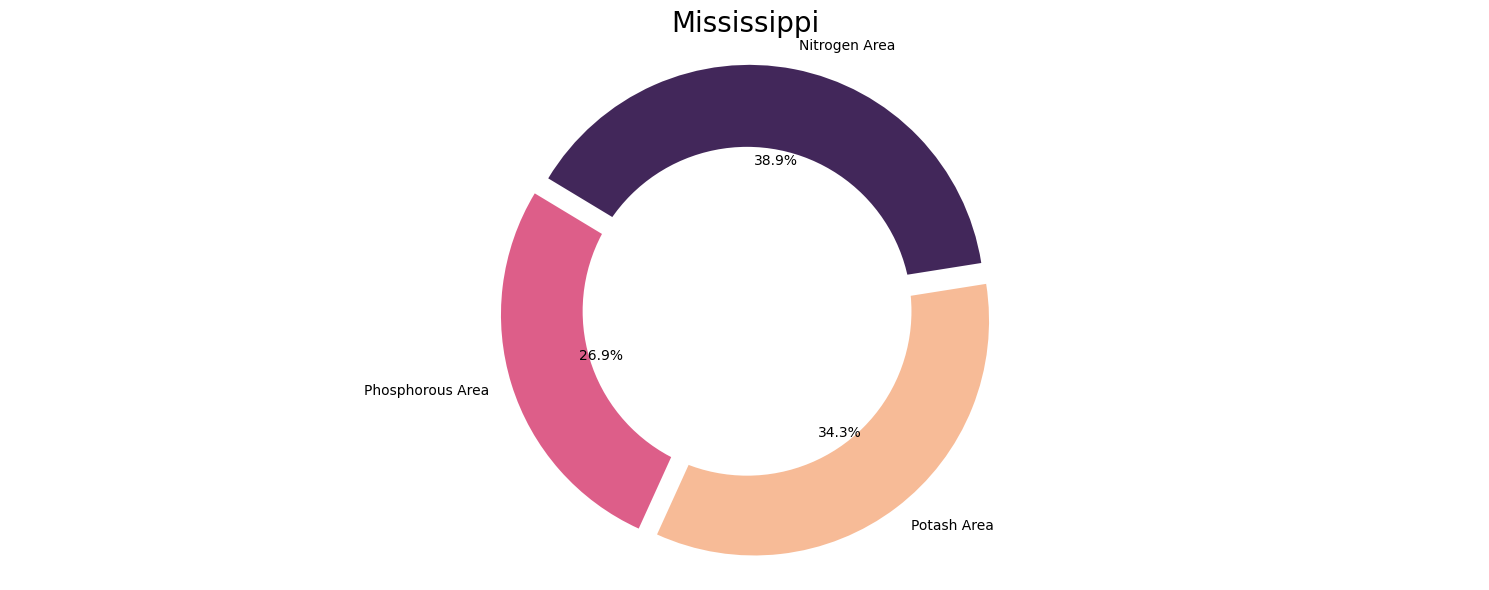

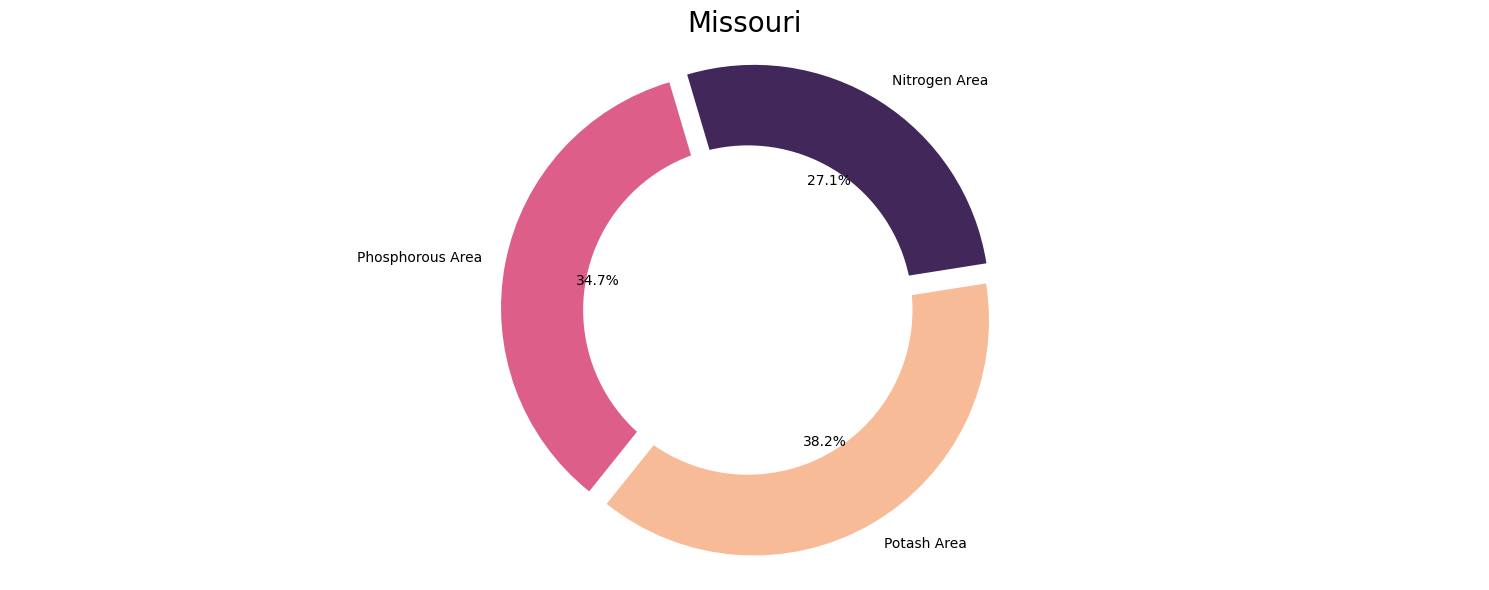

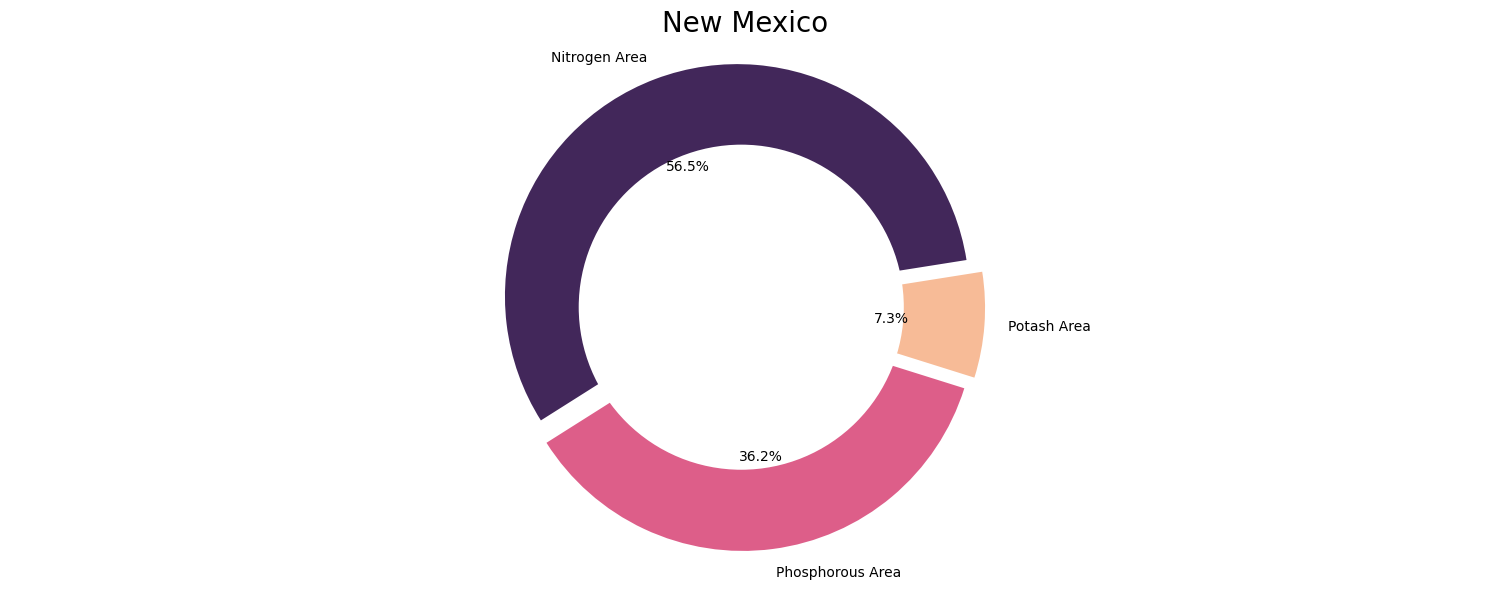

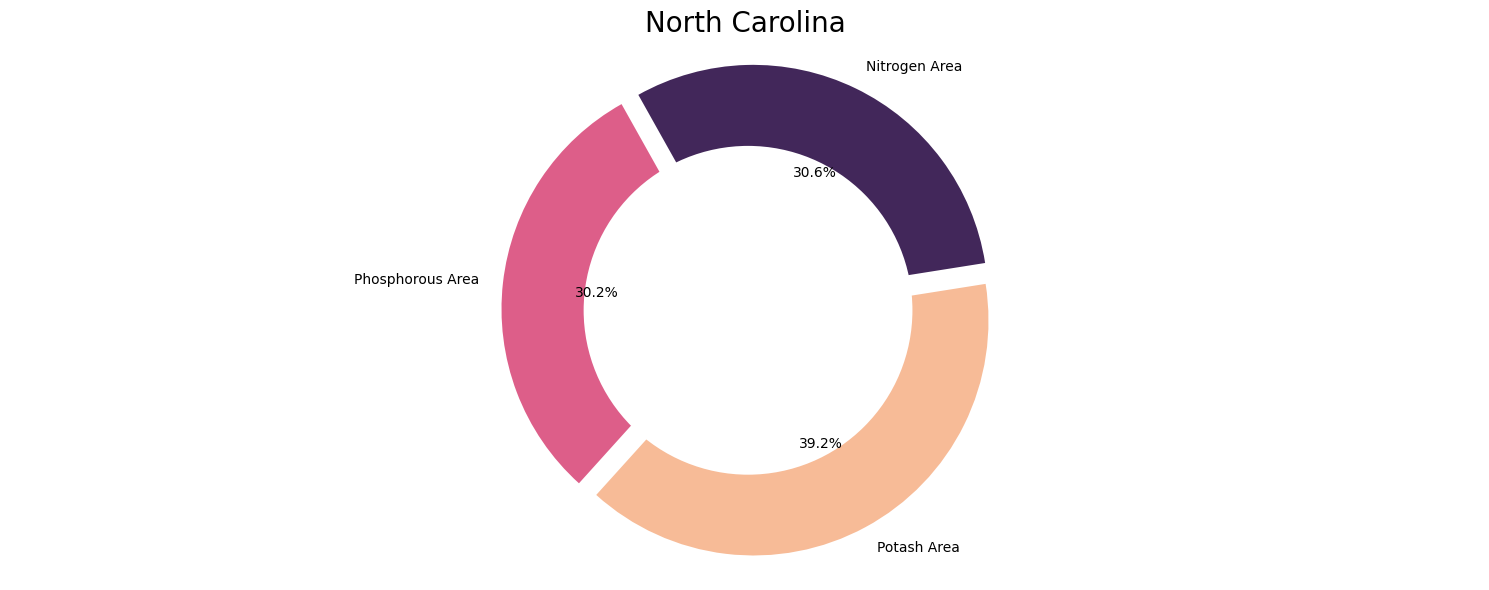

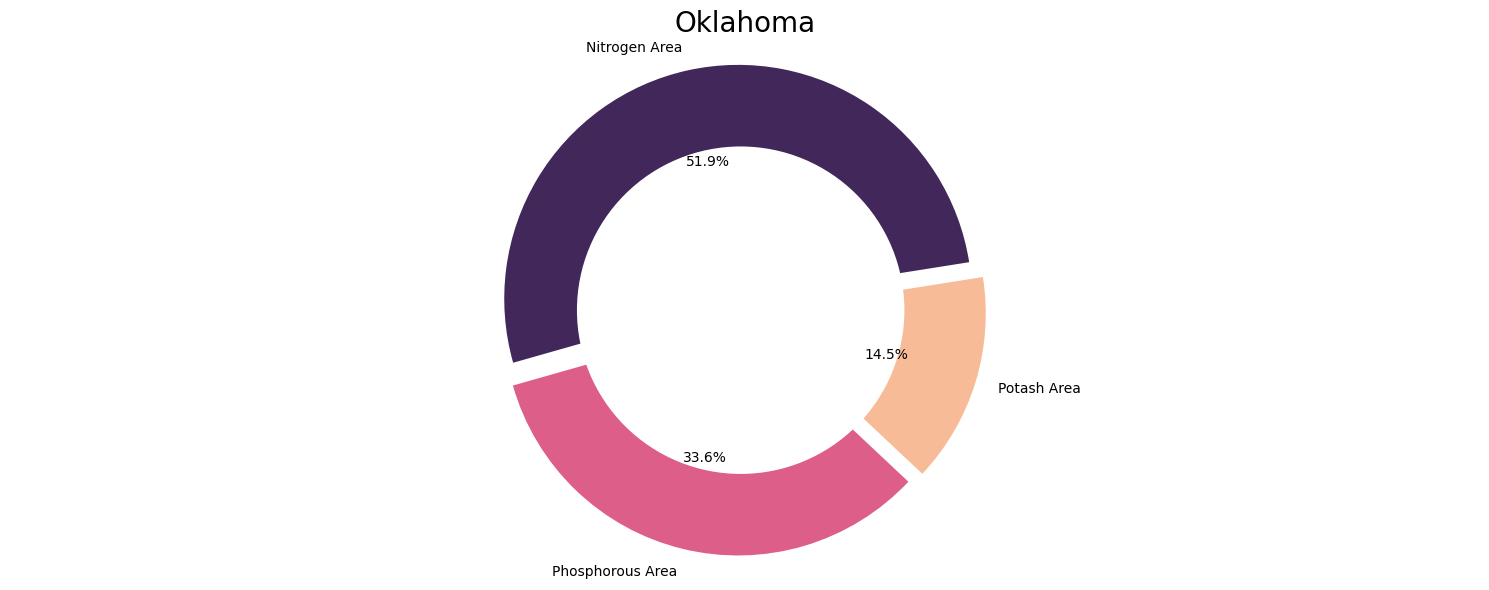

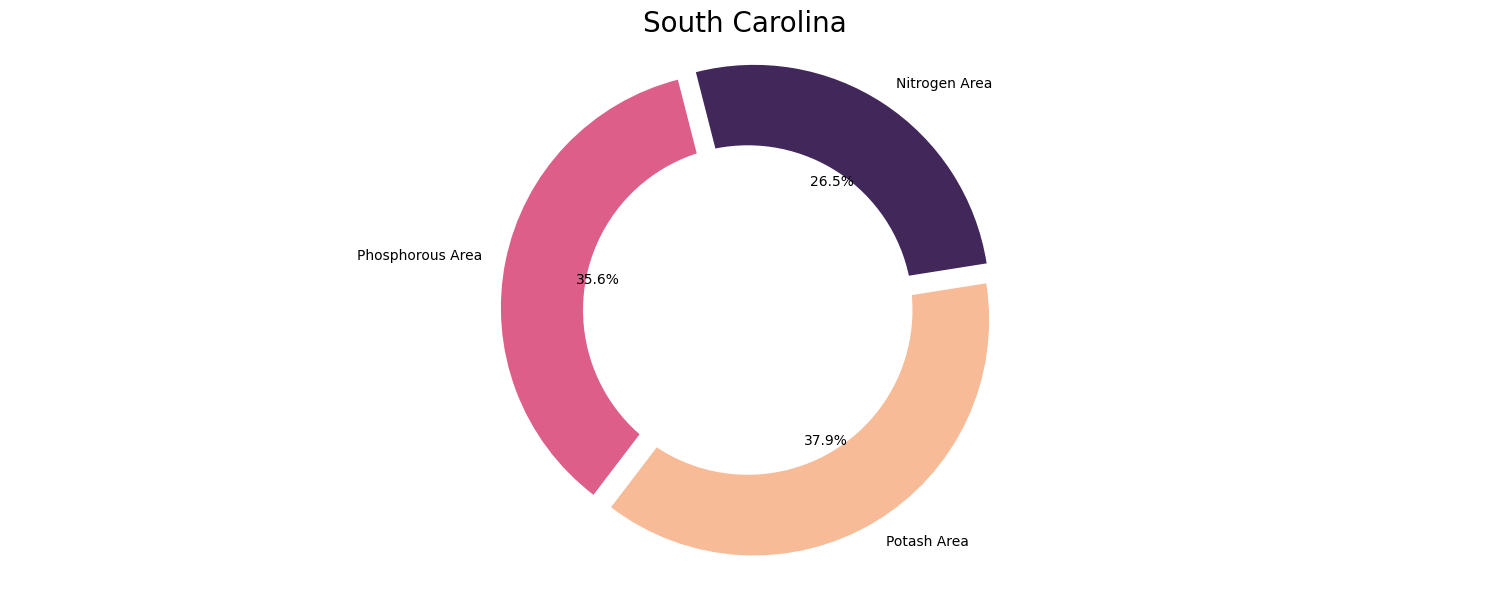

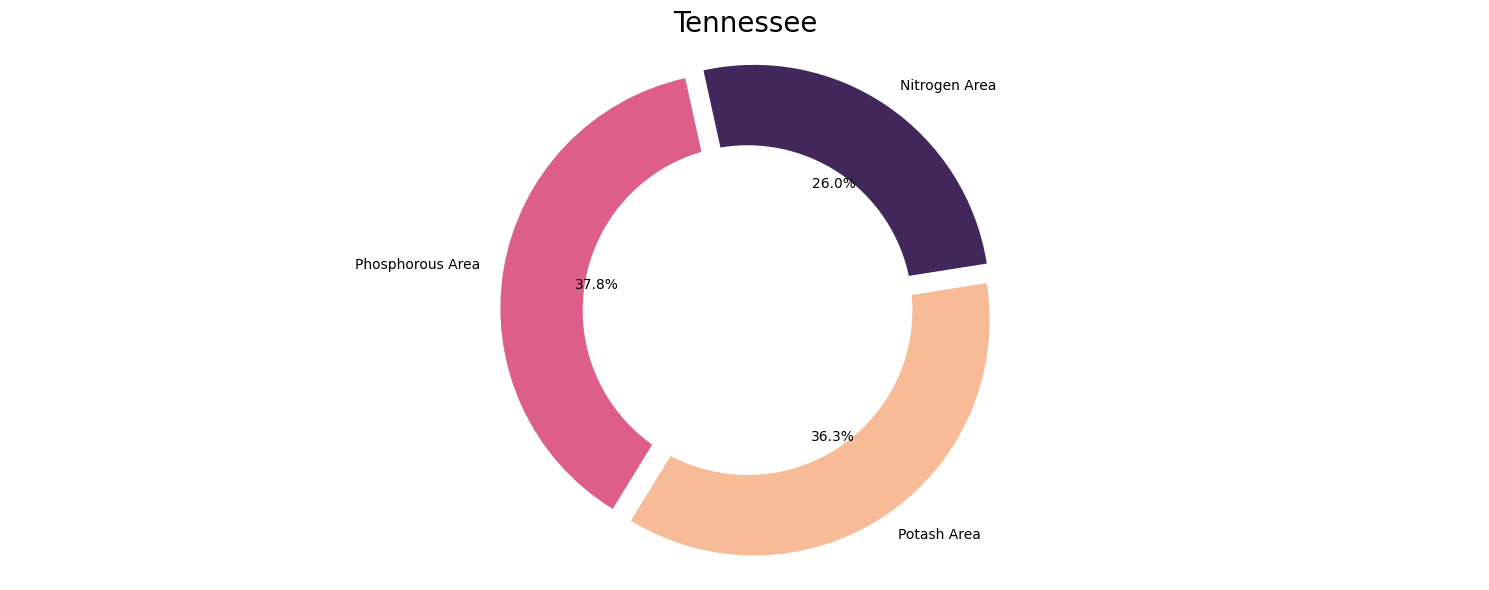

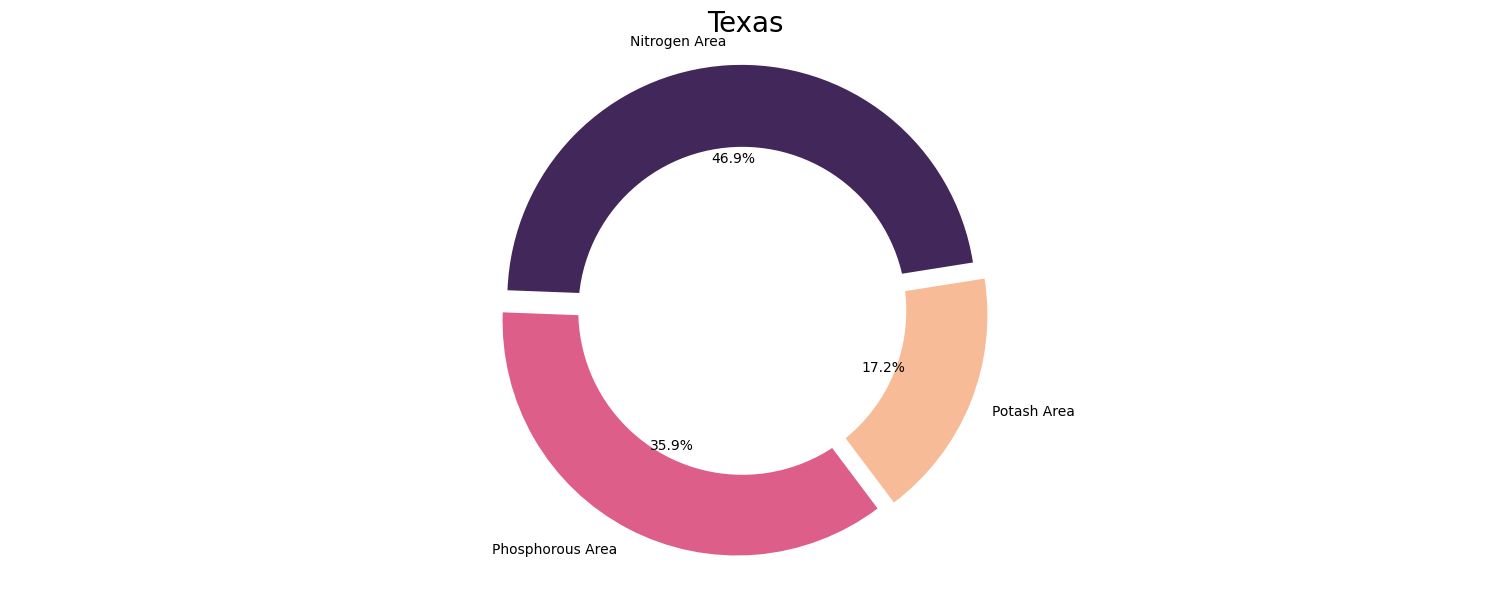

In [ ]:
def plot_pie(nitrogen,phosphorous,potash,title):
    labels = ['Nitrogen Area','Phosphorous Area','Potash Area']
    sizes = [nitrogen,phosphorous,potash]
    color= ['#42275a','#dd5e89','#f7bb97']
    explode = []

    for i in labels:
        explode.append(0.05)

    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title,fontsize = 20)
    plt.axis('equal')
    plt.tight_layout()

States = df_cotton['State'].unique().tolist()
States

state_df = pd.DataFrame()

for state in States:
    one_state_df = df_cotton.loc[df_cotton['State'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    phosphorous = one_state_df['Phosphorous (%)'].values[-1]
    potash = one_state_df['Potash (%)'].values[-1]
    nitrogen = df_cotton['Nitrogen (%)'].values[-1]
    plot_pie(nitrogen,phosphorous,potash,state)

In [ ]:
df_cotton['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Georgia',
       'Louisiana', 'Mississippi', 'Missouri', 'New Mexico',
       'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

In [ ]:
mapping = ({'Alabama':1,
'Arizona':2,
'Arkansas':3,
'California':4,
'Georgia':5,
'Louisiana':6,
'Mississippi':7,
'Missouri':8,
'New Mexico':9,
'North Carolina':10,
'Oklahoma':11,
'South Carolina':12,
'Tennessee':13,
'Texas':14,
           })
df_cotton=df_cotton.replace({'State': mapping})

In [ ]:
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,1,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222,644.688889
1,1,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222,644.688889
2,1,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222,644.688889
3,1,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222,644.688889
4,1,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222,644.688889
...,...,...,...,...,...,...,...,...,...,...,...
751,14,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000,610.000000
752,14,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000,748.000000
753,14,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000,809.000000
754,14,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000,756.000000


In [ ]:
x=df_cotton.drop('Lint Yield (Pounds/Harvested Acre)',axis=1)
y=df_cotton['Lint Yield (Pounds/Harvested Acre)']

x

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres)
0,1,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222
1,1,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222
2,1,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222
3,1,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222
4,1,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222
...,...,...,...,...,...,...,...,...,...,...
751,14,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000
752,14,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000
753,14,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000
754,14,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000


In [ ]:
y

0      644.688889
1      644.688889
2      644.688889
3      644.688889
4      644.688889
          ...    
751    610.000000
752    748.000000
753    809.000000
754    756.000000
755    568.000000
Name: Lint Yield (Pounds/Harvested Acre), Length: 756, dtype: float64

# Model Implementation - Gradient Regressor with 5 Folds Cross Validation

Pearsons correlation: -0.463
Pearsons correlation: 0.389
Pearsons correlation: 0.261
Pearsons correlation: 0.669
Pearsons correlation: -0.319
Pearsons correlation: 0.309
Pearsons correlation: -0.351
Pearsons correlation: -0.084
Pearsons correlation: -0.233
Pearsons correlation: -0.226


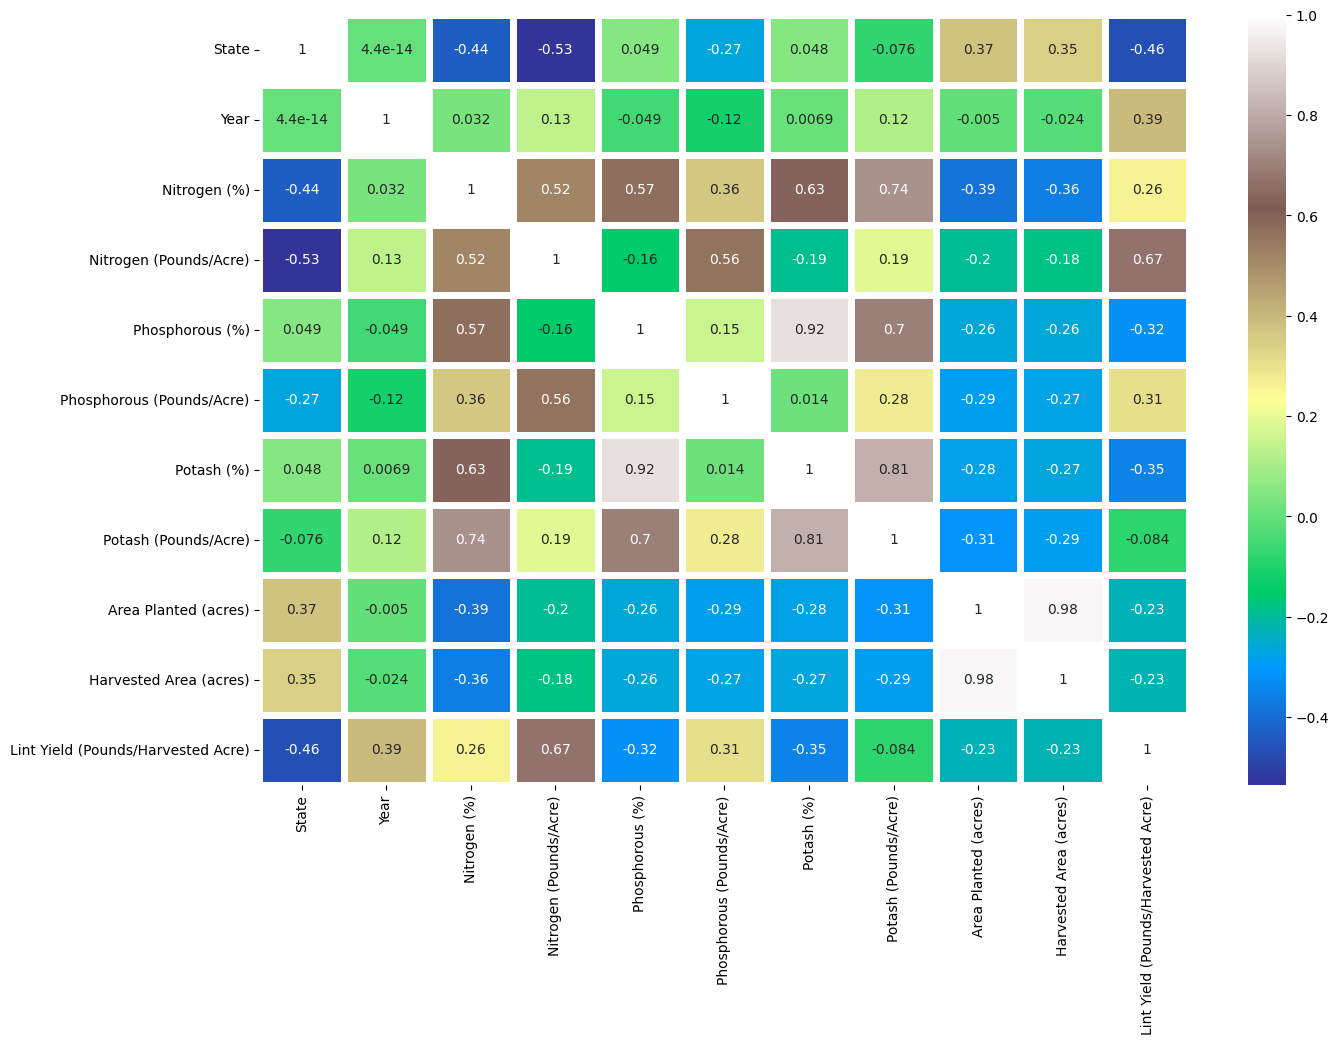

In [ ]:
cor1, _ = pearsonr(df_cotton['State'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Nitrogen (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Nitrogen (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Phosphorous (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Phosphorous (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Potash (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Potash (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Area Planted (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Harvested Area (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

#create a correlation heatmap
sns.heatmap(df_cotton.corr(),annot=True,cmap='terrain',linewidth=5)
fig=plt.gcf() #method to make heatmap
fig.set_size_inches(15,10)

#negative means less correlation

**MODEL FIT**

In [ ]:
#No need to drop any columns since the Pearson Correlations are upwards 0.2 (medium relations)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% for Training and 20% for Testing
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(604, 10) (152, 10) (604,) (152,)


In [ ]:
from sklearn import ensemble
yield_predict = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,learning_rate = 0.1, loss = 'ls')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor with the correct loss parameter
yield_predict = GradientBoostingRegressor(loss='squared_error', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
yield_predict.fit(x_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
yield_predict_test=yield_predict.predict(x_test)
yield_predict_train=yield_predict.predict(x_train)
pd.DataFrame({'actual unseen data':y_train,'predicted unseen data':yield_predict_train})

,actual unseen data,predicted unseen data
502,699.000000,609.101272
372,1232.000000,1092.310670
681,505.000000,606.537683
10,399.000000,450.838397
157,1092.000000,1046.825665
...,...,...
735,475.000000,492.058214
744,659.000000,670.913231
705,509.844444,529.931523
113,805.911111,776.370592


In [ ]:
scores = cross_val_score(yield_predict, x_test, y_test, cv=5)
scores

array([0.80638611, 0.75546141, 0.80285263, 0.91373317, 0.74681698])

In [ ]:
predictions = cross_val_predict(yield_predict, x_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)
accuracy

0.8019388292591171

In [ ]:
print('MAE= ',metrics.mean_absolute_error(y_test,yield_predict_test))
print('MSE= ',metrics.mean_squared_error(y_test,yield_predict_test))
print('R2 value= ',yield_predict.score(x_test,y_test))


MAE=  81.16629596320547
MSE=  12906.469710506575
R2 value=  0.8642647770283709


**DEEP LEARNING ALGORITHM**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

test_loss = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)




Epoch 1/50
19/19 [==============================] - 1s 12ms/step - loss: 684425.9375 - val_loss: 690716.8125
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 682268.8750 - val_loss: 688099.5625
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 678824.1875 - val_loss: 683659.0625
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 673084.3125 - val_loss: 676244.7500
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 663758.6875 - val_loss: 664600.8125
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 649415.5625 - val_loss: 647410.6875
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 628677.2500 - val_loss: 623083.8750
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 600669.5625 - val_loss: 590154.6250
Epoch 9/50
19/19 [==============================] - 0s 6ms/step - loss: 564025.0000 - val_loss: 548983.7500
Epoch 10/50
19/19 [========

**Convolutional Neural Networks (CNNs)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


tabular_data = pd.read_csv('/content/Unprocessed Data.csv')


y_data = tabular_data['Lint Yield (Pounds/Harvested Acre)'].values

# Split the data into training and testing sets
# Data preprocessing (if necessary)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
input_dim = 10
# Define a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for yield prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

output_dim=1

# Define the CNN model for crop yield prediction
model = keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=(input_dim,)),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(output_dim)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')



# Evaluate the model
mse = model.evaluate(x_test, y_test)
print("Mean Squared Error:", mse)


Epoch 1/50
19/19 [==============================] - 1s 10ms/step - loss: 684055.0625 - val_loss: 690307.8750
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 681572.4375 - val_loss: 687487.5000
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 677828.1250 - val_loss: 682956.6250
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 671888.9375 - val_loss: 675705.5625
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 662564.7500 - val_loss: 664514.8125
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 648696.1250 - val_loss: 647972.8750
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 628904.0625 - val_loss: 625446.5625
Epoch 8/50
19/19 [==============================] - 0s 4ms/step - loss: 602872.2500 - val_loss: 595188.1875
Epoch 9/50
19/19 [==============================] - 0s 4ms/step - loss: 568695.3125 - val_loss: 558015.6875
Epoch 10/50
19/19 [========

In [ ]:


# Evaluate the model
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
predictions = cross_val_predict(yield_predict, x_test, y_test, cv=150)
accuracy = metrics.r2_score(y_test, predictions)
print("Accuracy:",accuracy)


5/5 [==============================] - 0s 3ms/step - loss: 691898.5000
Test Loss: 691898.5
Accuracy: 0.8161799048280377


**Radial Basics Function(RBF)Neural Network**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Generate some sample data (you would use your text data)
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use K-Means to find the centers for radial basis functions
n_clusters = 2  # Number of clusters (centers)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

# Calculate the RBF features (Gaussian kernel)
gamma = 1.0  # Adjust the value of gamma as needed
X_train_rbf = rbf_kernel(X_train, centers, gamma)
X_test_rbf = rbf_kernel(X_test, centers, gamma)

# Train a classifier (e.g., MLP) on the RBF features with regularization
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train_rbf, y_train)

# Test the model on the test data
y_pred = mlp.predict(X_test_rbf)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7166666666666667


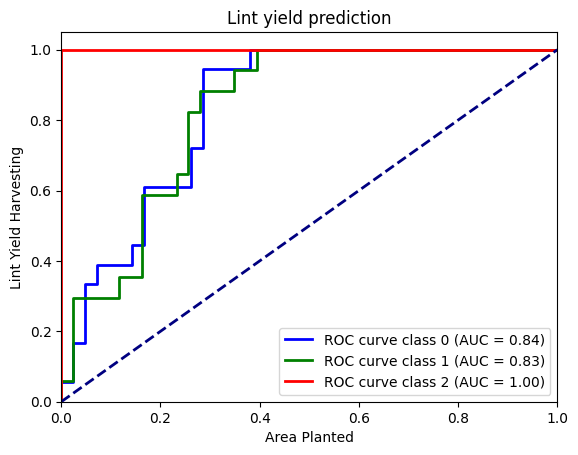

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Test the model on the test data
y_pred = mlp.predict(X_test_rbf)

# Calculate the probability scores for each class
y_scores = mlp.predict_proba(X_test_rbf)

# Calculate ROC curves and AUC for each class
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['b', 'g', 'r']  # You can extend this list for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve class {i} (AUC = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Area Planted')
plt.ylabel('Lint Yield Harvesting')
plt.title('Lint yield prediction')
plt.legend(loc='lower right')
plt.show()


Iteration 1, loss = 1.14551961
Iteration 2, loss = 1.12135958
Iteration 3, loss = 1.09927550
Iteration 4, loss = 1.08086737
Iteration 5, loss = 1.06403185
Iteration 6, loss = 1.04758839
Iteration 7, loss = 1.03174755
Iteration 8, loss = 1.01633262
Iteration 9, loss = 1.00078037
Iteration 10, loss = 0.98483771
Iteration 11, loss = 0.96883631
Iteration 12, loss = 0.95260453
Iteration 13, loss = 0.93584877
Iteration 14, loss = 0.91927640
Iteration 15, loss = 0.90307202
Iteration 16, loss = 0.88648801
Iteration 17, loss = 0.86927504
Iteration 18, loss = 0.85180502
Iteration 19, loss = 0.83393782
Iteration 20, loss = 0.81591097
Iteration 21, loss = 0.79781598
Iteration 22, loss = 0.77964531
Iteration 23, loss = 0.76154393
Iteration 24, loss = 0.74354793
Iteration 25, loss = 0.72573962
Iteration 26, loss = 0.70839568
Iteration 27, loss = 0.69155239
Iteration 28, loss = 0.67531951
Iteration 29, loss = 0.65985145
Iteration 30, loss = 0.64517771
Iteration 31, loss = 0.63120082
Iteration 32, los

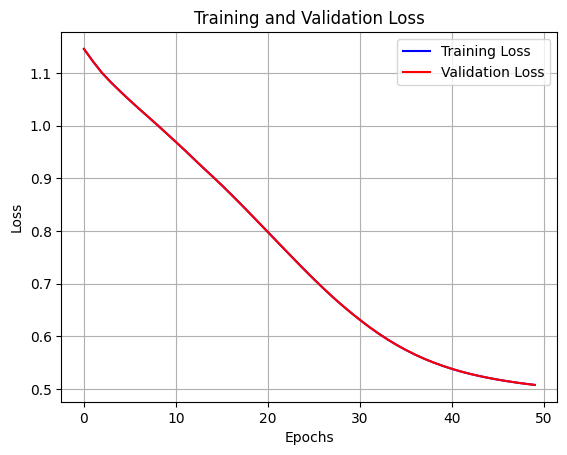

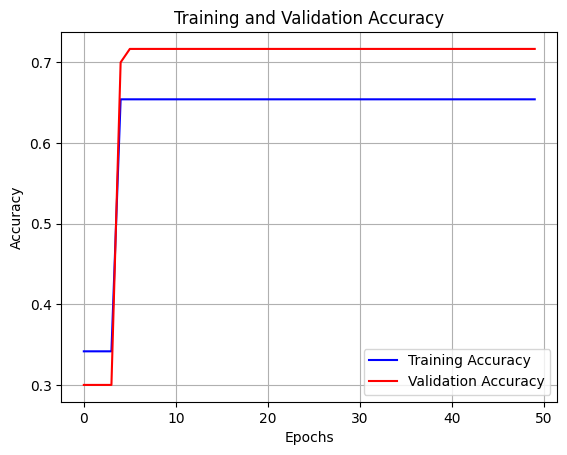

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ... (Rest of your code)

# Train the MLP classifier and record the training history
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.01, random_state=42, verbose=True)

train_loss = []  # To store training loss
val_loss = []    # To store validation loss
train_accuracy = []  # To store training accuracy
val_accuracy = []    # To store validation accuracy

for epoch in range(50):  # Adjust the number of epochs as needed
    mlp.partial_fit(X_train_rbf, y_train, classes=np.unique(y_train))

    train_loss.append(mlp.loss_)
    train_accuracy.append(accuracy_score(y_train, mlp.predict(X_train_rbf)))

    # Calculate validation loss and accuracy
    val_loss.append(mlp.loss_)
    val_accuracy.append(accuracy_score(y_test, mlp.predict(X_test_rbf)))

# Create a graph to visualize training and validation loss
plt.figure()
plt.plot(train_loss, label='Training Loss', color='b')
plt.plot(val_loss, label='Validation Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Create a graph to visualize training and validation accuracy
plt.figure()
plt.plot(train_accuracy, label='Training Accuracy', color='b')
plt.plot(val_accuracy, label='Validation Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# # fix random seed for reproducibility
# tf.random.set_seed(7)
# # load the dataset
# dataframe = pd.read_csv('/content/Unprocessed Data.csv', usecols=[1], engine='python')
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# # split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# print(len(train), len(test))

In [ ]:
# # convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return np.array(dataX), np.array(dataY)
#  # reshape into X=t and Y=t+1
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

In [ ]:
# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

In [ ]:
# # shift train predictions for plotting
# # Assuming you have a model named 'model' and a dataset named 'trainX'

# # Generate predictions on the training data
# trainPredict = model.predict(trainX)

# # Then you can use 'trainPredict' in the following code to plot predictions.

# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# # Assuming you have a model named 'model' and a dataset named 'testX'

# # Generate predictions on the test data
# testPredict = model.predict(testX)

# # Then you can use 'testPredict' in your code to plot predictions.

# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()
